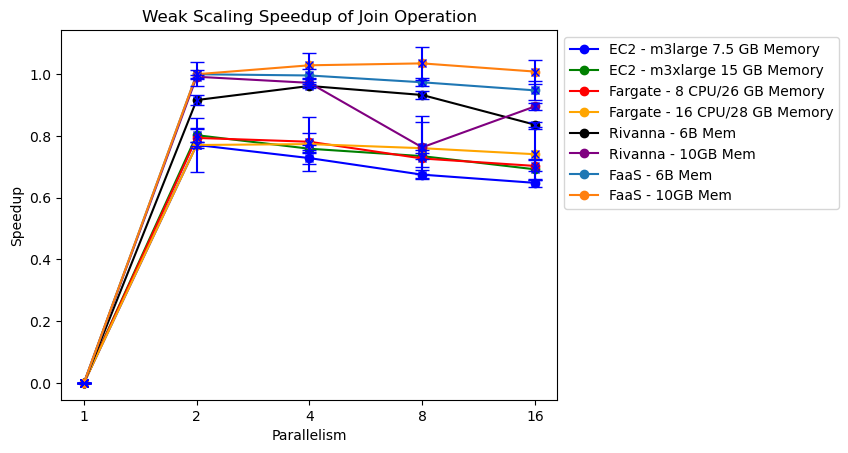

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_speedup_error(baseline, baseline_err, times, times_err):
    speedup_err = [0]  # First speedup error is 0 since speedup is manually set to 0
    for t, t_err in zip(times[1:], times_err[1:]):
        err = np.sqrt((baseline_err / baseline) ** 2 + (t_err / t) ** 2)
        speedup_err.append(err * (baseline / t))
    return speedup_err

# Given data (Execution times)
world_size = ['1', '2', '4', '8', '16']
ec2_m3xlarge = [31.81303746, 39.63874075, 41.93214922, 43.30321313, 45.96938671]
ec2_m3large = [31.9575935, 41.45354041, 43.87812226, 47.36638606, 49.3063335]
fargate_4_26 = [33.68554413, 42.44095802, 43.11394629, 46.3293512, 47.92054052]
fargate_16_28 = [31.50847322, 40.88083729, 40.72470558, 41.43658119, 42.52811459]
rivanna_10 = [20.283350747, 20.44974059, 20.86548781, 26.57821665, 22.64570893]
rivanna_6 = [20.2543124, 22.10368815, 21.05417195, 21.7123192, 24.20997563]
lambda_10 = [21.15279511, 21.15279511, 20.55785678, 20.43429001, 20.9718425]
lambda_6 = [20.70955434, 20.70955434, 20.79345037, 21.26396433, 21.85083299]


ec2_m3xlarge_err = [0.3517278022, 0.9953671923, 0.5647224212, 0.4130273663, 2.144212403]
ec2_m3large_err = [0.4395588026, 0.1830921417, 1.01652381, 0.7280315442, 0.6893845133]
fargate_4_26_err = [0.05400982477, 1.46033826, 1.515233265, 1.808315597, 1.200178515]
fargate_16_28_err = [3.518690911, 0.5573273239, 0.3047347395, 0.2670398924, 0.2849529409]
rivanna_10_err = [0.0766260739, 0.05929428636, 0.2302652761, 3.501597134, 0.240115264]
rivanna_6_err = [0.01402970209, 0.367896922, 0.1316620241, 0.3194760097, 0.2126870876]
lambda_10_err = [0.5908764711, 0.5908764711, 0.5617459735, 0.884176371, 0.5619542773]
lambda_6_err = [0.206974149, 0.206974149, 0.4204491114, 0.1793480701, 0.663419514]

# Calculate speedup (use the first value in each series as the baseline)
ec2_m3large_speedup = [0] + [ec2_m3large[0] / time for time in ec2_m3large[1:]]
ec2_m3xlarge_speedup = [0] + [ec2_m3xlarge[0] / time for time in ec2_m3xlarge[1:]]
fargate_4_26_speedup = [0] + [fargate_4_26[0] / time for time in fargate_4_26[1:]]
fargate_16_28_speedup = [0] + [fargate_16_28[0] / time for time in fargate_16_28[1:]]
rivanna_6_speedup = [0] + [rivanna_6[0] / time for time in rivanna_6[1:]]
rivanna_10_speedup = [0] + [rivanna_10[0] / time for time in rivanna_10[1:]]
lambda_6_speedup = [0] + [lambda_6[0] / time for time in lambda_6[1:]]
lambda_10_speedup = [0] + [lambda_10[0] / time for time in lambda_10[1:]]

# Create a line chart for speedup
plt.plot(world_size, ec2_m3large_speedup, marker='o', color='b', label='EC2 - m3large 7.5 GB Memory')
plt.plot(world_size, ec2_m3xlarge_speedup, marker='o', color='g', label='EC2 - m3xlarge 15 GB Memory')
plt.plot(world_size, fargate_4_26_speedup, marker='o', color='r', label='Fargate - 8 CPU/26 GB Memory')
plt.plot(world_size, fargate_16_28_speedup, marker='o', color='orange', label='Fargate - 16 CPU/28 GB Memory')
plt.plot(world_size, rivanna_6_speedup, marker='o', color='black', label='Rivanna - 6B Mem')
plt.plot(world_size, rivanna_10_speedup, marker='o', color='purple', label='Rivanna - 10GB Mem')
plt.plot(world_size, lambda_6_speedup, marker='o',  label='FaaS - 6B Mem')
plt.plot(world_size, lambda_10_speedup, marker='o',  label='FaaS - 10GB Mem')

ec2_m3large_speedup_err = calculate_speedup_error(ec2_m3large[0], ec2_m3large_err[0], ec2_m3large, ec2_m3large_err)
ec2_m3xlarge_speedup_err = calculate_speedup_error(ec2_m3xlarge[0], ec2_m3xlarge_err[0], ec2_m3xlarge, ec2_m3xlarge_err)
fargate_4_26_speedup_err = calculate_speedup_error(fargate_4_26[0], fargate_4_26_err[0], fargate_4_26, fargate_4_26_err)
fargate_16_28_speedup_err = calculate_speedup_error(fargate_16_28[0], fargate_16_28_err[0], fargate_16_28, fargate_16_28_err)
rivanna_6_speedup_err = calculate_speedup_error(rivanna_6[0], rivanna_6_err[0], rivanna_6, rivanna_6_err)
rivanna_10_speedup_err = calculate_speedup_error(rivanna_10[0], rivanna_10_err[0], rivanna_10, rivanna_10_err)
lambda_6_speedup_err = calculate_speedup_error(lambda_6[0], lambda_6_err[0], lambda_6, lambda_6_err)
lambda_10_speedup_err = calculate_speedup_error(lambda_10[0], lambda_10_err[0], lambda_10, lambda_10_err)
# Create the plot with error bars
plt.errorbar(world_size, ec2_m3large_speedup, yerr=ec2_m3large_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, ec2_m3xlarge_speedup, yerr=ec2_m3xlarge_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, fargate_4_26_speedup, yerr=fargate_4_26_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, fargate_16_28_speedup, yerr=fargate_16_28_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, rivanna_6_speedup, yerr=rivanna_6_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, rivanna_10_speedup, yerr=rivanna_10_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, lambda_6_speedup, yerr=lambda_6_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, lambda_10_speedup, yerr=lambda_10_speedup_err, fmt='x', color='b',  capsize=5)


# Invert the x-axis so the graph goes from right to left
#plt.gca().invert_xaxis()

# Add labels and title for speedup plot
plt.xlabel('Parallelism')
plt.ylabel('Speedup')
plt.title('Weak Scaling Speedup of Join Operation')

# Add a legend
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Display the chart
plt.show()


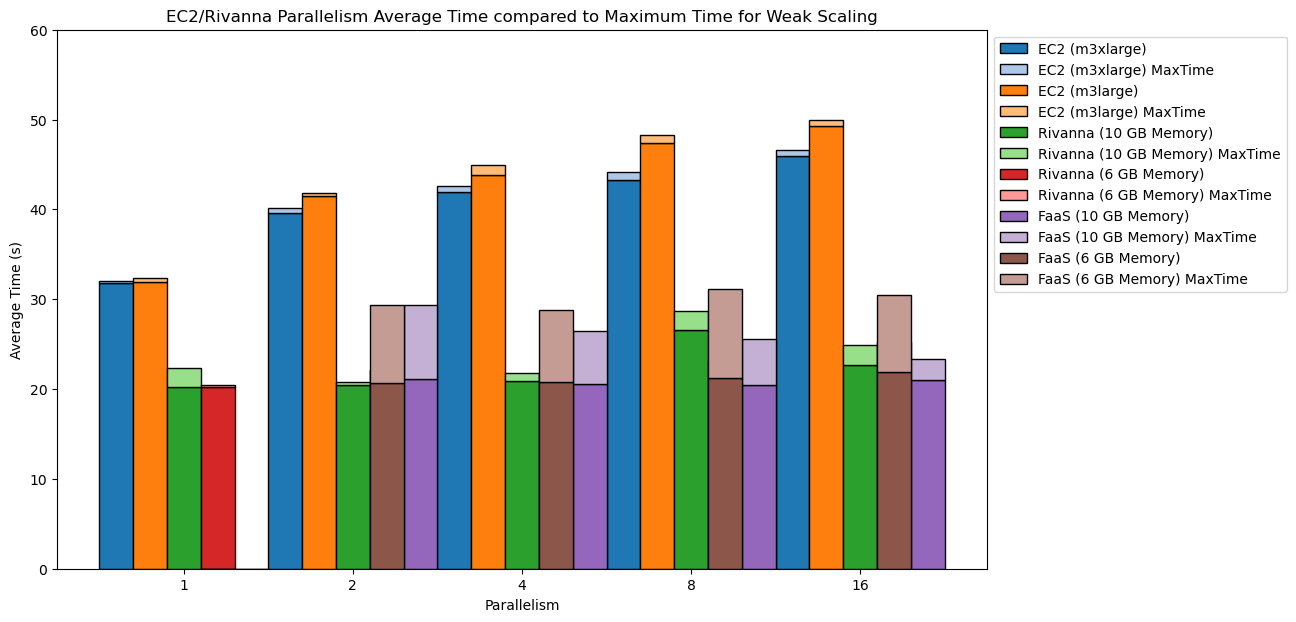

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
world_size = ['1', '2', '4', '8', '16']
ec2_m3xlarge = [31.81303746, 39.63874075, 41.93214922, 43.30321313, 45.96938671]
ec2_m3large = [31.9575935, 41.45354041, 43.87812226, 47.36638606, 49.3063335]
rivanna_10 = [20.283350747, 20.44974059, 20.86548781, 26.57821665, 22.64570893]
rivanna_6 = [20.2543124, 22.10368815, 21.05417195, 21.7123192, 24.20997563]
lambda_10 = [0, 21.15279511, 20.55785678, 20.43429001, 20.9718425]
lambda_6 = [0, 20.70955434, 20.79345037, 21.26396433, 21.85083299]

# Max times
ec2_m3xlarge_maxtime = [31.97906429, 40.15021896, 42.58941686, 44.14431083, 46.58438277]
ec2_m3large_maxtime = [32.39680201, 41.80149472, 44.9744007, 48.23062742, 49.92480689]
rivanna_10_maxtime = [22.34185421, 20.76285899, 21.79966176, 28.73472738, 24.90794182]
rivanna_6_maxtime = [20.44968545, 21.05417195, 21.68439543, 23.12490159, 25.22119254]
lambda_10_maxtime = [0, 29.36744094, 26.48254609, 25.54506624, 23.31065124]
lambda_6_maxtime = [0, 29.34014976, 28.8135922, 31.12369776, 30.42764068]

# Set width of bar
barWidth = 0.2

br1 = np.arange(len(world_size))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

fig, ax = plt.subplots(figsize=(12, 7))

# Get a colormap from Matplotlib
cmap = plt.get_cmap('tab20') 

# Create the bars with custom colors
plt.bar(br1, ec2_m3xlarge, width=barWidth, color=cmap(0), edgecolor='black', label='EC2 (m3xlarge)')
plt.bar(br1, np.subtract(ec2_m3xlarge_maxtime, ec2_m3xlarge), width=barWidth, bottom=ec2_m3xlarge,
        color=cmap(1), edgecolor='black', label='EC2 (m3xlarge) MaxTime')

plt.bar(br2, ec2_m3large, width=barWidth, color=cmap(2), edgecolor='black', label='EC2 (m3large)')
plt.bar(br2, np.subtract(ec2_m3large_maxtime, ec2_m3large), width=barWidth, bottom=ec2_m3large,
        color=cmap(3), edgecolor='black', label='EC2 (m3large) MaxTime')

plt.bar(br3, rivanna_10, width=barWidth, color=cmap(4), edgecolor='black', label='Rivanna (10 GB Memory)')
plt.bar(br3, np.subtract(rivanna_10_maxtime, rivanna_10), width=barWidth, bottom=rivanna_10,
        color=cmap(5), edgecolor='black', label='Rivanna (10 GB Memory) MaxTime')

plt.bar(br4, rivanna_6, width=barWidth, color=cmap(6), edgecolor='black', label='Rivanna (6 GB Memory)')
plt.bar(br4, np.subtract(rivanna_6_maxtime, rivanna_6), width=barWidth, bottom=rivanna_6,
        color=cmap(7), edgecolor='black', label='Rivanna (6 GB Memory) MaxTime')

plt.bar(br5, lambda_10, width=barWidth, color=cmap(8), edgecolor='black', label='FaaS (10 GB Memory)')
plt.bar(br5, np.subtract(lambda_10_maxtime, lambda_10), width=barWidth, bottom=lambda_10,
        color=cmap(9), edgecolor='black', label='FaaS (10 GB Memory) MaxTime')

plt.bar(br4, lambda_6, width=barWidth, color=cmap(10), edgecolor='black', label='FaaS (6 GB Memory)')
plt.bar(br4, np.subtract(lambda_6_maxtime, lambda_6), width=barWidth, bottom=lambda_6,
        color=cmap(11), edgecolor='black', label='FaaS (6 GB Memory) MaxTime')

# Customize the chart
#custom_text = "9.1m rows (1/2/4/8/16 Nodes)"
#plt.text(1, 55, custom_text, fontsize=10, color='black', ha='right')

plt.ylim(0, 60)
plt.xticks([r + 2*barWidth for r in range(len(world_size))], world_size)

# Add labels and title
plt.xlabel('Parallelism')
plt.ylabel('Average Time (s)')
plt.title('EC2/Rivanna Parallelism Average Time compared to Maximum Time for Weak Scaling')

# Add a legend
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Display the chart
plt.show()



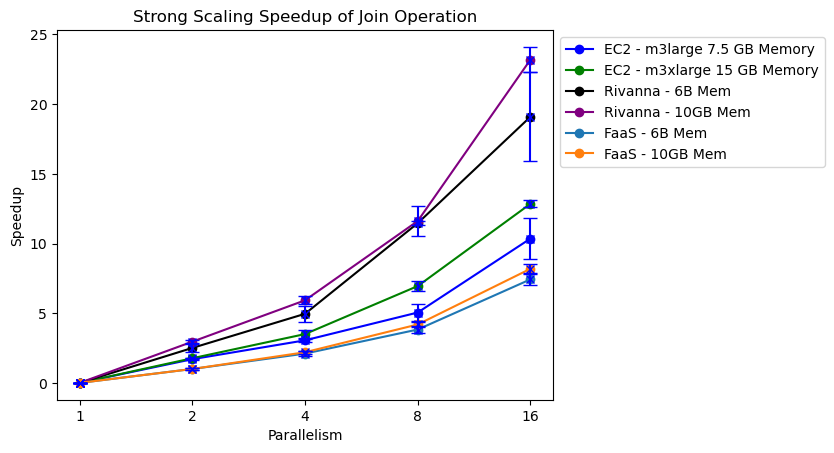

In [6]:
import matplotlib.pyplot as plt

def calculate_speedup_error(baseline, baseline_err, times, times_err):
    speedup_err = [0]  # First speedup error is 0 since speedup is manually set to 0
    for t, t_err in zip(times[1:], times_err[1:]):
        err = np.sqrt((baseline_err / baseline) ** 2 + (t_err / t) ** 2)
        speedup_err.append(err * (baseline / t))
    return speedup_err

# Given data (Execution times)
world_size = ['1', '2', '4', '8', '16']
ec2_m3xlarge = [15.70240098, 8.870626986, 4.482245743, 2.259730674, 1.221921537]
ec2_m3large = [15.74712437, 9.252302825, 5.153833002, 3.117997304, 1.520751711]
rivanna_10 = [14.51742262, 4.909102499, 2.4498813, 1.250059165, 0.6260035746]
rivanna_6 = [13.88448954, 5.535035193, 2.800700009, 1.211611904, 0.7271465138]
lambda_10 = [5.368814588, 5.368814588, 2.440020621, 1.280620955, 0.6556467414]
lambda_6 = [5.182266384, 5.182266384, 2.463554531, 1.352761179, 0.697574988]


ec2_m3xlarge_err = [0.08439028095, 0.157554956, 0.3508381357, 0.1080719208, 0.02375073291]
ec2_m3large_err = [0.3369034646, 0.1851905057, 0.1660521391, 0.3790465547, 0.2091007611]
rivanna_10_err = [0.5685704618, 0.04463999532, 0.06546624386, 0.1090687147, 0.001450514915]
rivanna_6_err = [0.1847222178, 0.661580777, 0.3312568602, 0.003647900008, 0.1204176788]
lambda_10_err = [0.2073281645, 0.2073281645, 0.08887594444, 0.03399906126, 0.01447215291]
lambda_6_err = [0.2160287958, 0.2160287958, 0.1537679231, 0.07257118223, 0.02917017383]

# Calculate speedup (use the first value in each series as the baseline)
ec2_m3large_speedup = [0] + [ec2_m3large[0] / time for time in ec2_m3large[1:]]
ec2_m3xlarge_speedup = [0] + [ec2_m3xlarge[0] / time for time in ec2_m3xlarge[1:]]
rivanna_6_speedup = [0] + [rivanna_6[0] / time for time in rivanna_6[1:]]
rivanna_10_speedup = [0] + [rivanna_10[0] / time for time in rivanna_10[1:]]
lambda_6_speedup = [0] + [lambda_6[0] / time for time in lambda_6[1:]]
lambda_10_speedup = [0] + [lambda_10[0] / time for time in lambda_10[1:]]

# Create a line chart for speedup
plt.plot(world_size, ec2_m3large_speedup, marker='o', color='b', label='EC2 - m3large 7.5 GB Memory')
plt.plot(world_size, ec2_m3xlarge_speedup, marker='o', color='g', label='EC2 - m3xlarge 15 GB Memory')
plt.plot(world_size, rivanna_6_speedup, marker='o', color='black', label='Rivanna - 6B Mem')
plt.plot(world_size, rivanna_10_speedup, marker='o', color='purple', label='Rivanna - 10GB Mem')
plt.plot(world_size, lambda_6_speedup, marker='o',  label='FaaS - 6B Mem')
plt.plot(world_size, lambda_10_speedup, marker='o',  label='FaaS - 10GB Mem')

ec2_m3large_speedup_err = calculate_speedup_error(ec2_m3large[0], ec2_m3large_err[0], ec2_m3large, ec2_m3large_err)
ec2_m3xlarge_speedup_err = calculate_speedup_error(ec2_m3xlarge[0], ec2_m3xlarge_err[0], ec2_m3xlarge, ec2_m3xlarge_err)
#fargate_4_26_speedup_err = calculate_speedup_error(fargate_4_26[0], fargate_4_26_err[0], fargate_4_26, fargate_4_26_err)
#fargate_16_28_speedup_err = calculate_speedup_error(fargate_16_28[0], fargate_16_28_err[0], fargate_16_28, fargate_16_28_err)
rivanna_6_speedup_err = calculate_speedup_error(rivanna_6[0], rivanna_6_err[0], rivanna_6, rivanna_6_err)
rivanna_10_speedup_err = calculate_speedup_error(rivanna_10[0], rivanna_10_err[0], rivanna_10, rivanna_10_err)
lambda_6_speedup_err = calculate_speedup_error(lambda_6[0], lambda_6_err[0], lambda_6, lambda_6_err)
lambda_10_speedup_err = calculate_speedup_error(lambda_10[0], lambda_10_err[0], lambda_10, lambda_10_err)
# Create the plot with error bars
plt.errorbar(world_size, ec2_m3large_speedup, yerr=ec2_m3large_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, ec2_m3xlarge_speedup, yerr=ec2_m3xlarge_speedup_err, fmt='x', color='b',  capsize=5)
#plt.errorbar(world_size, fargate_4_26_speedup, yerr=fargate_4_26_speedup_err, fmt='x', color='b',  capsize=5)
#plt.errorbar(world_size, fargate_16_28_speedup, yerr=fargate_16_28_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, rivanna_6_speedup, yerr=rivanna_6_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, rivanna_10_speedup, yerr=rivanna_10_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, lambda_6_speedup, yerr=lambda_6_speedup_err, fmt='x', color='b',  capsize=5)
plt.errorbar(world_size, lambda_10_speedup, yerr=lambda_10_speedup_err, fmt='x', color='b',  capsize=5)


# Invert the x-axis so the graph goes from right to left
#plt.gca().invert_xaxis()

# Add labels and title for speedup plot
plt.xlabel('Parallelism')
plt.ylabel('Speedup')
plt.title('Strong Scaling Speedup of Join Operation')

# Add a legend
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Display the chart
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


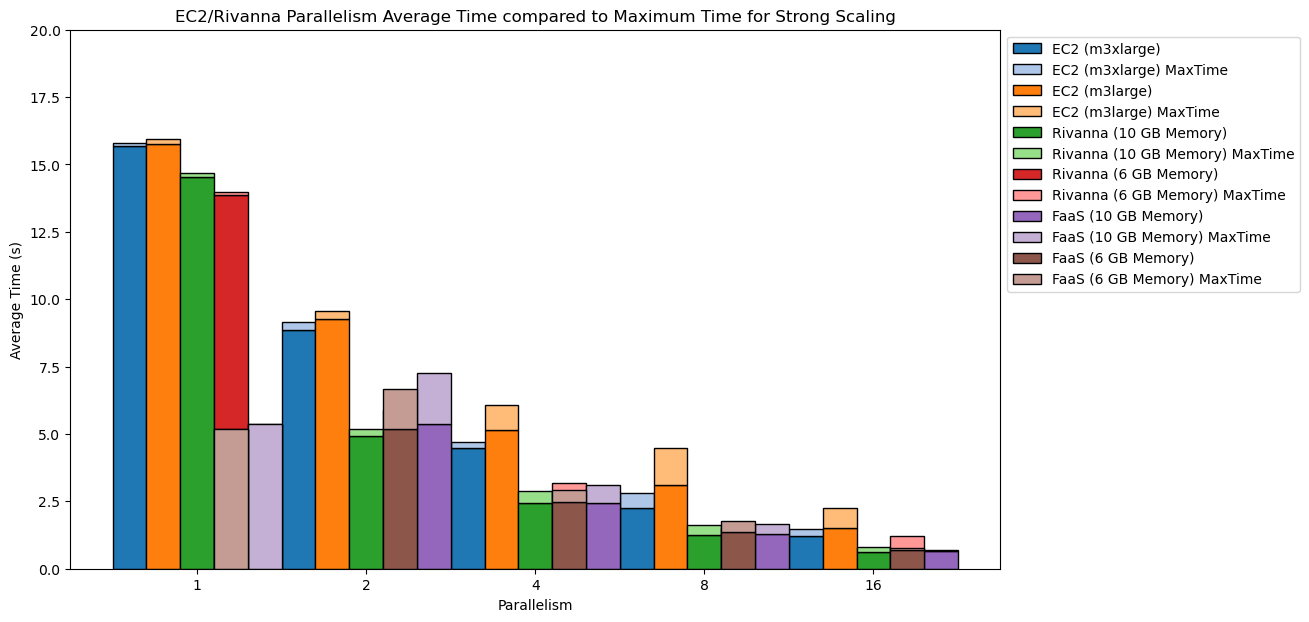

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
world_size = ['1', '2', '4', '8', '16']
ec2_m3xlarge = [15.70240098, 8.870626986, 4.482245743, 2.259730674, 1.221921537]
ec2_m3large = [15.74712437, 9.252302825, 5.153833002, 3.117997304, 1.520751711]
rivanna_10 = [14.51742262, 4.909102499, 2.4498813, 1.250059165, 0.6260035746]
rivanna_6 = [13.88448954, 5.535035193, 2.800700009, 1.211611904, 0.7271465138]
lambda_10 = [5.368814588, 5.368814588, 2.440020621, 1.280620955, 0.6556467414]
lambda_6 = [5.182266384, 5.182266384, 2.463554531, 1.352761179, 0.697574988]

# Max times
ec2_m3xlarge_maxtime = [15.80353147, 9.139918685, 4.703745127, 2.8117522, 1.46199882]
ec2_m3large_maxtime = [15.92827284, 9.57028985, 6.080078125, 4.488986373, 2.26417625]
rivanna_10_maxtime = [14.68316424, 5.202726126, 2.89727211, 1.620241344, 0.7914561033]
rivanna_6_maxtime = [13.99045928, 5.882119179, 3.188248575, 1.511425972, 1.201866627]
lambda_10_maxtime = [0, 7.270818353, 3.091948867, 1.654246092, 0.684468329]
lambda_6_maxtime = [0,6.662686467, 2.926540136, 1.763717949, 0.7636286616 ]

# Set width of bar
barWidth = 0.2

br1 = np.arange(len(world_size))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

fig, ax = plt.subplots(figsize=(12, 7))

# Get a colormap from Matplotlib
cmap = plt.get_cmap('tab20') 

# Create the bars with custom colors
plt.bar(br1, ec2_m3xlarge, width=barWidth, color=cmap(0), edgecolor='black', label='EC2 (m3xlarge)')
plt.bar(br1, np.subtract(ec2_m3xlarge_maxtime, ec2_m3xlarge), width=barWidth, bottom=ec2_m3xlarge,
        color=cmap(1), edgecolor='black', label='EC2 (m3xlarge) MaxTime')

plt.bar(br2, ec2_m3large, width=barWidth, color=cmap(2), edgecolor='black', label='EC2 (m3large)')
plt.bar(br2, np.subtract(ec2_m3large_maxtime, ec2_m3large), width=barWidth, bottom=ec2_m3large,
        color=cmap(3), edgecolor='black', label='EC2 (m3large) MaxTime')

plt.bar(br3, rivanna_10, width=barWidth, color=cmap(4), edgecolor='black', label='Rivanna (10 GB Memory)')
plt.bar(br3, np.subtract(rivanna_10_maxtime, rivanna_10), width=barWidth, bottom=rivanna_10,
        color=cmap(5), edgecolor='black', label='Rivanna (10 GB Memory) MaxTime')

plt.bar(br4, rivanna_6, width=barWidth, color=cmap(6), edgecolor='black', label='Rivanna (6 GB Memory)')
plt.bar(br4, np.subtract(rivanna_6_maxtime, rivanna_6), width=barWidth, bottom=rivanna_6,
        color=cmap(7), edgecolor='black', label='Rivanna (6 GB Memory) MaxTime')

plt.bar(br5, lambda_10, width=barWidth, color=cmap(8), edgecolor='black', label='FaaS (10 GB Memory)')
plt.bar(br5, np.subtract(lambda_10_maxtime, lambda_10), width=barWidth, bottom=lambda_10,
        color=cmap(9), edgecolor='black', label='FaaS (10 GB Memory) MaxTime')

plt.bar(br4, lambda_6, width=barWidth, color=cmap(10), edgecolor='black', label='FaaS (6 GB Memory)')
plt.bar(br4, np.subtract(lambda_6_maxtime, lambda_6), width=barWidth, bottom=lambda_6,
        color=cmap(11), edgecolor='black', label='FaaS (6 GB Memory) MaxTime')

# Customize the chart
#custom_text = "9.1m rows (1/2/4/8/16 Nodes)"
#plt.text(1, 55, custom_text, fontsize=10, color='black', ha='right')

plt.ylim(0, 20)
plt.xticks([r + 2*barWidth for r in range(len(world_size))], world_size)

# Add labels and title
plt.xlabel('Parallelism')
plt.ylabel('Average Time (s)')
plt.title('EC2/Rivanna Parallelism Average Time compared to Maximum Time for Strong Scaling')

# Add a legend
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Display the chart
plt.show()